In [16]:
import pandas as pd

df = pd.read_excel('./datasets/R&E데이터.xlsx')
df

,순위,선수명,팀명,AVG,G,PA,AB,H,2B,3B,...,HBP,SO,GDP,E,연도,장,R,TB,SAC,SF
0,1,백인천,MBC,0.412,71,298,250,103,23,1,...,3.0,17.0,5.0,0.0,1982,1,NaN,NaN,NaN,NaN
1,2,윤동균,OB,0.342,77,334,284,97,20,5,...,1.0,27.0,3.0,2.0,1982,1,NaN,NaN,NaN,NaN
2,3,장태수,삼성,0.336,66,264,214,72,15,3,...,5.0,33.0,1.0,2.0,1982,1,NaN,NaN,NaN,NaN
3,4,신경식,OB,0.334,78,320,293,98,21,3,...,3.0,17.0,2.0,6.0,1982,1,NaN,NaN,NaN,NaN
4,5,김봉연,해태,0.331,74,304,269,89,14,1,...,6.0,16.0,8.0,6.0,1982,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,39,김재환,두산,0.239,92,374,318,76,11,2,...,NaN,NaN,NaN,NaN,2025,2,39.0,124.0,0.0,2.0
1871,40,로하스,KT,0.239,95,384,331,79,20,0,...,NaN,NaN,NaN,NaN,2025,2,48.0,141.0,0.0,4.0
1872,41,노시환,한화,0.234,101,436,380,89,18,1,...,NaN,NaN,NaN,NaN,2025,2,68.0,169.0,0.0,2.0
1873,42,권희동,NC,0.233,96,340,266,62,18,0,...,NaN,NaN,NaN,NaN,2025,2,43.0,95.0,4.0,2.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression()
X = df.drop(columns=['선수명', '순위', '팀명', '장', '연도', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'E']).loc[740:, :] # 독립변수

# Y = df['열'].map({'값': 0, '갑': 1})
Y = df['AVG'].loc[740:]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 740 to 1874
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AVG     1135 non-null   float64
 1   G       1135 non-null   int64  
 2   PA      1135 non-null   int64  
 3   AB      1135 non-null   int64  
 4   H       1135 non-null   int64  
 5   2B      1135 non-null   int64  
 6   3B      1135 non-null   int64  
 7   HR      1135 non-null   int64  
 8   RBI     1135 non-null   int64  
 9   R       1135 non-null   float64
 10  TB      1135 non-null   float64
 11  SAC     1135 non-null   float64
 12  SF      1135 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 115.4 KB


In [29]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1135 entries, 740 to 1874
Series name: AVG
Non-Null Count  Dtype  
--------------  -----  
1135 non-null   float64
dtypes: float64(1)
memory usage: 9.0 KB


In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
# train_test_split()
x_train

,AVG,G,PA,AB,H,2B,3B,HR,RBI,R,TB,SAC,SF
1499,0.279,123,477,401,112,19,2,27,80,69.0,216.0,0.0,10.0
1392,0.290,130,472,411,119,15,0,15,64,49.0,179.0,2.0,7.0
1271,0.309,111,419,376,116,25,1,18,72,56.0,197.0,0.0,2.0
1631,0.302,135,471,407,123,21,1,4,44,53.0,158.0,12.0,2.0
1557,0.262,142,624,564,148,27,6,8,57,83.0,211.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,0.233,127,474,403,94,9,2,10,54,56.0,137.0,8.0,4.0
1503,0.270,136,473,430,116,15,6,5,45,79.0,158.0,3.0,2.0
1575,0.328,130,528,461,151,26,1,33,124,86.0,278.0,1.0,6.0
1299,0.362,139,598,520,188,42,1,23,116,103.0,301.0,1.0,8.0


In [31]:
model.fit(x_train, y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [53]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], shape=(11284,))

In [54]:
y_test

40005    0
7776     0
51792    1
29206    0
8763     0
        ..
1603     1
11803    1
12832    0
14426    0
27547    0
Name: RainTomorrow, Length: 11284, dtype: int64

In [55]:
model.score(x_test, y_test)

0.8556362991846863

---

# 시각화

In [59]:
from math import e
sigmoid = lambda x: 1/(1+e**(-x))

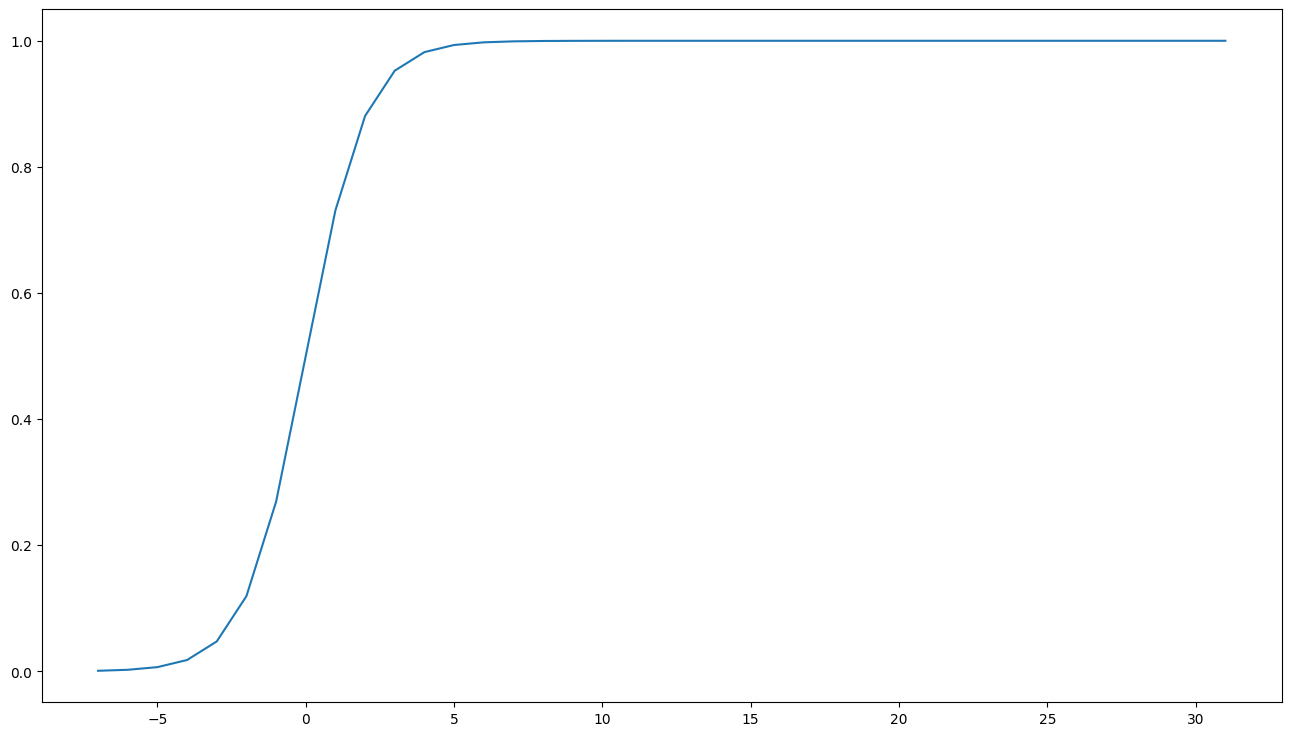

In [66]:
import matplotlib.pyplot as plt

m, M = round(df['MinTemp'].min()), round(df['MinTemp'].max())

plt.figure(figsize = (16, 9))
plt.plot([x for x in range(m, M+1)], [sigmoid(x) for x in range(m, M+1)])
plt.show()